In [1]:
import pandas as pd
from fbprophet import Prophet
from datetime import datetime
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.rcParams["figure.figsize"] = (20,10)
import numpy as np

In [2]:
df = pd.read_csv('myit.csv', index_col='DATE', parse_dates=True) # historical average temperature of Myitkyina,
# Myanmar downloaded from NOAA
# displaying with DATE column as index coletumn


In [3]:
df.head() #displaying some data

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
DATE,,,,,,,,,,,,,
2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [4]:
datatest=df.reset_index() #resetting index, see the difference, without resetting it, it cannot rename columns
datatest.head()

,DATE,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"
1,2010-01-02,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",NaN,NaN,NaN,NaN
2,2010-01-03,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,60,"H,,S",81.0,",,S",46.0,",,S"
3,2010-01-04,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,62,"H,,S",81.0,",,S",45.0,",,S"
4,2010-01-06,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,65,"H,,S",NaN,NaN,49.0,",,S"


In [5]:
datatest=datatest.rename(columns={'DATE':'ds', 'TAVG':'y'}) 
#renaming the columns for prophet, columns need to be ds and y for DATE(date) and TAVG(temperature average)

In [6]:
datatest.tail(10)

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
2330,2017-12-22,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",NaN,NaN,51.0,",,S"
2331,2017-12-23,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,70,"H,,S",NaN,NaN,NaN,NaN
2332,2017-12-24,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",NaN,NaN,50.0,",,S"
2333,2017-12-26,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,70,"H,,S",80.0,",,S",50.0,",,S"
2334,2017-12-27,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,71,"H,,S",NaN,NaN,53.0,",,S"
2335,2017-12-28,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",82.0,",,S",51.0,",,S"
2336,2017-12-29,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,71,"H,,S",82.0,",,S",51.0,",,S"
2337,2017-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,72,"H,,S",NaN,NaN,53.0,",,S"
2338,2017-12-31,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,0.0,"B,,S",71,"H,,S",81.0,",,S",53.0,",,S"
2339,2018-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,68,"H,,S",74.0,",,S",53.0,",,S"


In [7]:
datatest=datatest.replace(0,np.NaN) 
#removing NaN(null) values and replaced with 0

In [8]:
model = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 
#creating model with yearly, weekly and daily seasonality
model.fit(datatest)
#fitting or training with dataset

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [9]:
future = model.make_future_dataframe(periods=1000, freq = 'd')
#make future dataframe of 1000 days in advance for predictions with daily frequency

In [10]:
forecast = model.predict(future)
#predicting the model

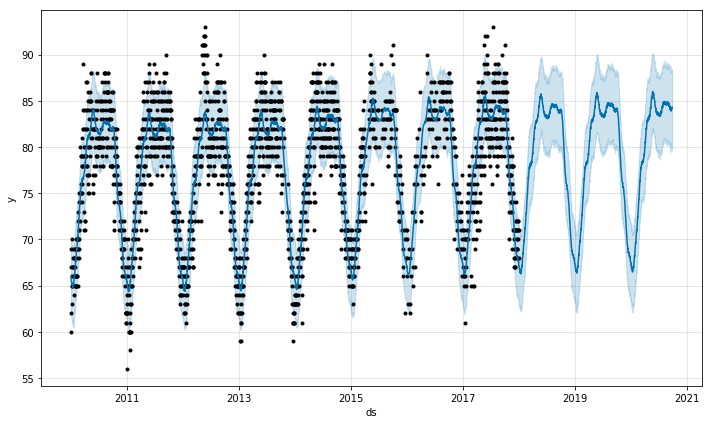

In [11]:
model.plot(forecast);
#visualizing the model, historical data only for January 2018, it predict to 2021

# Now We can verify the model with the existing data

In [12]:
tdata=datatest.head(365+289)

In [13]:
tdata.head(1)
# training data from 2010-01-01 

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"


In [14]:
tdata.tail(1)
# training data to the end of 2011-12-30, total 2 years

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
653,2011-12-30,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,67,"H,,S",82.0,",,S",55.0,",,S"


In [15]:
vdata=datatest.head(654+643)
# Preaparing for 4 years to verify the training dataset above

In [16]:
vdata.head(1)
# from the start of 2010-01-01 

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,2010-01-01,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,69,"H,,S",NaN,NaN,50.0,",,S"


In [17]:
vdata.tail(1)
# to the end of 2013, total 4 years

,ds,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,PRCP,PRCP_ATTRIBUTES,y,TAVG_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
1296,2013-12-31,BMM00048008,"MYITKYINA, BM",25.367,97.4,147.0,NaN,NaN,64,"H,,S",78.0,",,S",50.0,",,S"


In [18]:
tmodel = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 
vmodel = Prophet(yearly_seasonality=True,weekly_seasonality=True,daily_seasonality=True) 

#creating model with yearly, weekly and daily seasonality testing model and verifiying model
tmodel.fit(tdata)
vmodel.fit(vdata)

#fitting or training with dataset of testdata and verifing data

/home/ttw/anaconda3/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [19]:
tfuture = tmodel.make_future_dataframe(periods=1297-565, freq = 'd')
#predicting for (4 years days 1297 - 2 years 654 days) with daily frequency
vfuture = vmodel.make_future_dataframe(periods=0, freq = 'd')
# verified model is not predicting, so periods is Zero

In [20]:
tforecast=tmodel.predict(tfuture)
vforecast=vmodel.predict(vfuture)
# forecasting the prediction

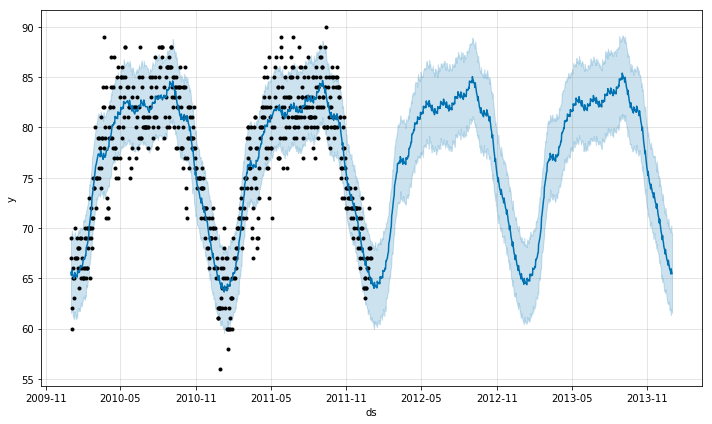

In [21]:
tmodel.plot(tforecast);
#visualizing the tested model with prediction of two years in advance, so it goes to december of 2013

In [22]:
tforecast.tail(1)
# here it shows the trend till 2013-12-31

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1385,2013-12-31,70.421465,69.441401,71.304043,61.543729,69.513037,-4.947571,-4.947571,-4.947571,7.111028,...,0.0,0.0,0.0,0.069845,0.069845,0.069845,-12.128443,-12.128443,-12.128443,65.473894


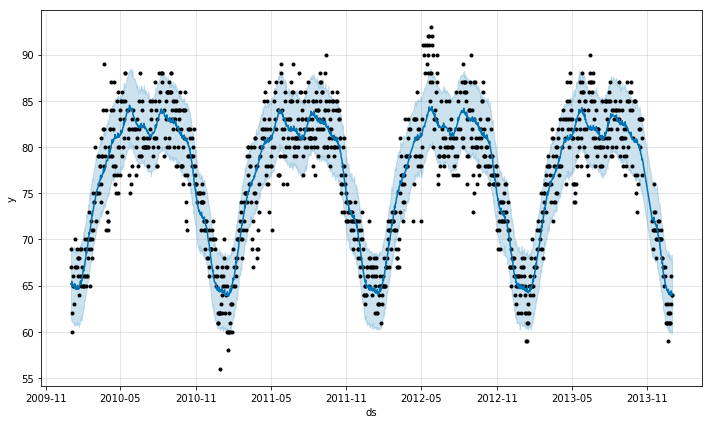

In [23]:
vmodel.plot(vforecast);
#visualizing the verifying model, no prediction, only data are scatterd and the model is just fitting to data points

# checking the intervals for testing forecast and verifying forecast

In [24]:
vforecast.tail(1)
# So here verify forecast is also goes to the date of 2013-12-13

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1296,2013-12-31,69.573482,69.573482,69.573482,60.30955,68.339475,-5.41219,-5.41219,-5.41219,6.715695,...,0.0,0.0,0.0,0.07686,0.07686,0.07686,-12.204745,-12.204745,-12.204745,64.161293


# Now plotting the training model and verifying model on graph

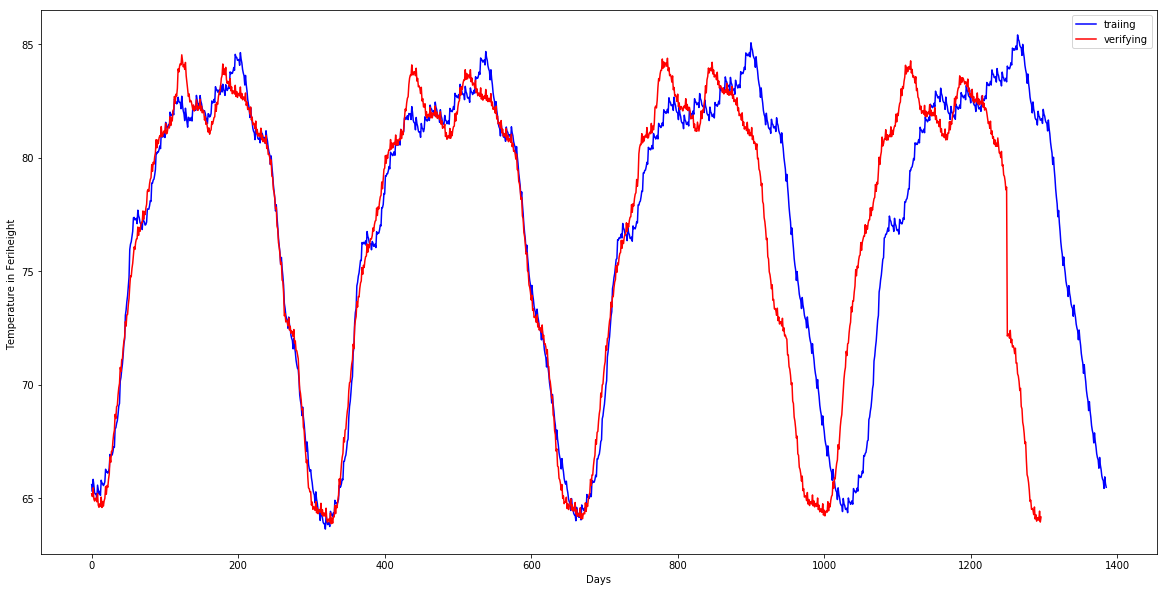

In [25]:
plt.plot(tforecast.loc[:, 'yhat'], color='blue', label='traiing')
plt.plot(vforecast.loc[:, 'yhat'], color='red', label='verifying')
plt.xlabel('Days')
plt.ylabel('Temperature in Feriheight ')
plt.legend()

# The above two graph are plotted on the same figure to see the difference between training and verifying models
# Both are in 4 years intervals, But for training 2 years data are used and 2 years trend is predicted,
# for verifying 4 years data are used and no trend is predicted

# For checking the prediction accuracy, only the last two years Intervals of training and verifying are needed, 

In [26]:
v=vforecast.tail(643);
# cut the last two years data from 2012-01-01 to 2013-12-31 of verifying forecast 

In [27]:
v.head(1)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
654,2012-01-01,70.1386,70.1386,70.1386,60.917114,68.70566,-5.170916,-5.170916,-5.170916,6.715695,...,0.0,0.0,0.0,0.322423,0.322423,0.322423,-12.209035,-12.209035,-12.209035,64.967683


In [28]:
v.tail(1)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1296,2013-12-31,69.573482,69.573482,69.573482,60.30955,68.339475,-5.41219,-5.41219,-5.41219,6.715695,...,0.0,0.0,0.0,0.07686,0.07686,0.07686,-12.204745,-12.204745,-12.204745,64.161293


In [29]:
t=tforecast.tail(731);
# cut the last two years data from 2012-01-01 to 2013-12-31 of training forecast 

In [30]:
t.head(1)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
655,2012-01-01,69.704905,69.704905,69.704905,61.138872,68.681977,-4.727861,-4.727861,-4.727861,7.111028,...,0.0,0.0,0.0,0.334533,0.334533,0.334533,-12.173422,-12.173422,-12.173422,64.977043


In [31]:
t.tail(1)

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
1385,2013-12-31,70.421465,69.441401,71.304043,61.543729,69.513037,-4.947571,-4.947571,-4.947571,7.111028,...,0.0,0.0,0.0,0.069845,0.069845,0.069845,-12.128443,-12.128443,-12.128443,65.473894


# Plotting the last two years interval for checking accurarcy 

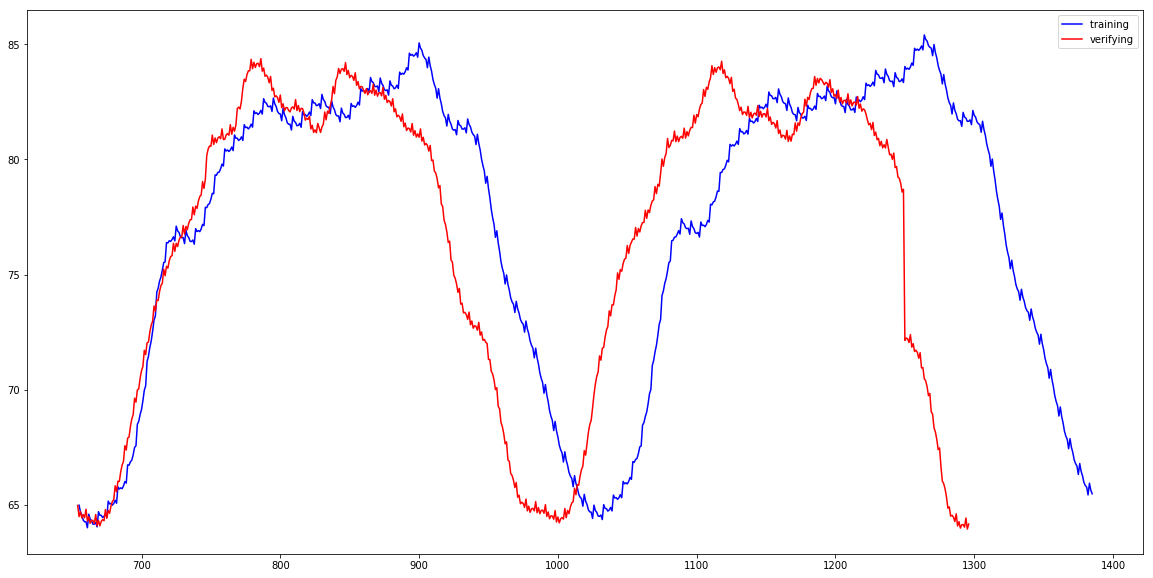

In [32]:
plt.plot(t.loc[:, 'yhat'], color='blue', label='training ')
plt.plot(v.loc[:, 'yhat'], color='red', label='verifying')
plt.legend()

# Calculating Root Mean Square Error for the last two years of training and verifying model

In [33]:
se = np.square(t.loc[:, 'yhat'] - v.loc[:, 'yhat'])
mse = np.mean(se)
rmse = np.sqrt(mse)

In [34]:
rmse

5.797332970724101